# Project: Wrangling and Analyzing Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [54]:
#Importing pandas to read the csv file
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from timeit import default_timer as timer
from tweepy import OAuthHandler
import json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
#Reading into the twitter archive dataset
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [56]:
#Downloading and saving the tweet image prediction using Requests
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [57]:
image_predictions_df = pd.read_csv('image-predictions.tsv' , sep ='\t')
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [58]:
# Use the Tweepy library to query additional data via the Twitter API 
consumer_key = 'dstbezp90qTUyPZRDiSOds7AP'
consumer_secret = 'QB1aR3fK2fcAUoqPEoIaT51MWlkxqDgq075Zbcxpw45GJJbt8f'
access_token = '2244280496-56c2JaXI8NiPdhMiJUrituDI9O9hKMPgyVSRN5m'
access_secret = 'WiYbEySlSJp5NQgAmoYXxTHa5kVTJIDZd5n25gmTqiByk'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [59]:
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944


Rate limit reached. Sleeping for: 47


Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
18

Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
20

Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
23

In [60]:
#reading the line by line to get each json data and store in a list
with open('tweet_json.txt', 'r') as json_file:
    file = []
    for line in json_file:
        lines = line.replace('\n', '')
        file.append(lines)
line_length = len(file)
tweet_id = []
retweet_count = []
favourite_count = []
tweet_date = []
data = {'tweet_id': [], 'retweet_count':[], 'favorite_count':[]}
for a in range(line_length):
    dictionary = json.loads(file[a])
    tweet_id.append(dictionary['id'])
    retweet_count.append(dictionary['retweet_count'])
    favourite_count.append(dictionary['favorite_count'])
data.update({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count' : favourite_count})
twitterApi_df = pd.DataFrame(data)

In [61]:
twitterApi_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33698
1,892177421306343426,5272,29226
2,891815181378084864,3464,21978
3,891689557279858688,7191,36793
4,891327558926688256,7718,35184
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [62]:
tweet_id_unique = np.union1d(image_predictions_df.tweet_id.unique(), twitter_archive_df.tweet_id.unique())
tweet_id_unique.size

2356

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment

Each piece of gathered data is displayed in this jupyter notebook for visual assessment purposes.

In [63]:
# twitter archive data
df = twitter_archive_df

#### twitter_archive columns description:

 - **tweet_id**: the unique identifier of each tweet
    
 - **in_reply_to_status_id**: contains the string representation of the original Tweet’s ID if the represented Tweet is a reply.
 
 - **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
 
 - **timestamp**: time of tweet
    
 - **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
 
 - **text**: actual UTF-8 text of the status update
    
 - **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
    
 - **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
    
 - **retweeted_status_timestamp**: time of retweet
    
 - **expanded_urls**: tweet URL
    
 - **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
        
 - **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
        
 - **name**: name of the dog
    
 - **doggo**: one of the 4 dog "stage"
    
 - **floofer**: one of the 4 dog "stage"
    
 - **pupper**: one of the 4 dog "stage"
    
 - **puppo**: one of the 4 dog "stageColumns description:

In [64]:
# displaying some contents of our twitter archive data
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [65]:
# image predictions data
df1 = image_predictions_df

#### image_predictions columns description:

 - **tweet_id**: the unique identifier for each tweet
    
 - **jpg_url**: dog's image URL
    
 - **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
    
 - **p1**: algorithm's #1 prediction for the image in the tweet
    
 - **p1_conf**: how confident the algorithm is in its #1 prediction
    
 - **p1_dog**: whether or not the #1 prediction is a breed of dog
    
 - **p2**: algorithm's #2 prediction for the image in the tweet
    
 - **p2_conf**: how confident the algorithm is in its #2 prediction
    
 - **p2_dog**: whether or not the #2 prediction is a breed of dog
    
 - **p3**: algorithm's #3 prediction for the image in the tweet
    
 - **p3_conf**: how confident the algorithm is in its #3 prediction
    
 - **p3_dog**: whether or not the #3 prediction is a breed of dog

In [66]:
# displaying some contents of our image predictions data
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [67]:
# twittterApi data
df2 = twitterApi_df

#### tweet_json columns description

 - **id**: the unique identifier for each tweet
        
 - **retweet_count**: the number of times the original tweet was retweeted
    
 - **favorite_count**: the number of times the the original tweet was liked
    
 - **followers_count**: the number of followers of WeRateDogs account as at the time of the each tweet
    
 - **friends_count**: the number of accounts WeRateDogs account was following at the time of each tweet

In [68]:
# displaying some contents of the twitterApi data
df2

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33698
1,892177421306343426,5272,29226
2,891815181378084864,3464,21978
3,891689557279858688,7191,36793
4,891327558926688256,7718,35184
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


## Programmatic Assessment

Each piece of gathered data is assessed using pandas functions and/or methods

### df = twitter_archive_df

In [69]:
# Displaying the first five rows of the twitter_archive data for pertinent issues
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [70]:
# concise summary of the twitter_archive data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [71]:
# statiscal description of the twitter_archive data
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [72]:
# number of rows and columns in twitter_archive data
df.shape

(2356, 17)

In [73]:
# number of duplicates in the twitter_archive data
df.duplicated().sum()

0

In [74]:
# number of unique values in each column of the twitter_archive data
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [75]:
# number of missing values in the twitter_archive data
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [76]:
# displaying columns in the twitter_archive data
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [77]:
# number of unique values in the source column of the twitter_archive data
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [78]:
#checking rating numerator count in the twitter_archive data
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [79]:
#checking rating denominator count in the twitter_archive data
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [80]:
# displaying rows with rating numerator greater than 15 in the twitter_archive data
df.loc[df['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [81]:
# displaying rows with rating denominator not equal to 10 in the twitter_archive data
df[df['rating_denominator'] !=10] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [82]:
# displaying rows in the twitter_archive data with retweets
df[df['text'].str.contains("RT")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [83]:
#unique names of dogs in the twitter_archive data
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [84]:
# displaying the count of dogs with specific names
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### df1 = image_predictions_df

In [85]:
# Displaying the first five rows of the image_predictions data for pertinent issues
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [86]:
# concise summary of the image_predictions data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
# statiscal description of the image_predictions data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


In [88]:
# number of rows and columns in image_predictions data
df1.shape

(2075, 12)

In [89]:
 # number of duplicates in the image_predictions data
df1.duplicated().sum()

0

In [90]:
# number of unique values in each column of the image_predictions data
df1.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [91]:
# number of missing values in the image_predictions data
df1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### df2 = twitterApi_df

In [92]:
# Displaying five sample rows of the twitterApi data for pertinent issues
df2.sample(5)

,tweet_id,retweet_count,favorite_count
22,887473957103951883,14952,59984
286,836648853927522308,506,0
1966,672594978741354496,528,1176
663,788412144018661376,4906,14667
971,748220828303695873,7079,13098


In [93]:
#concise summary of the twitterApi data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [94]:
# statiscal description of the twitterApi data
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2327.0,7.417930e+17,6.820795e+16,6.660209e+17,6.781394e+17,7.178418e+17,7.986547e+17,8.924206e+17
retweet_count,2327.0,2.458803e+03,4.163998e+03,1.000000e+00,4.925000e+02,1.144000e+03,2.845000e+03,7.033500e+04
favorite_count,2327.0,7.027167e+03,1.092053e+04,0.000000e+00,1.220500e+03,3.038000e+03,8.565500e+03,1.442530e+05


In [95]:
# number of rows and columns in twitterApi data
df2.shape

(2327, 3)

In [96]:
 # number of duplicates in the twitterApi data
sum(df.duplicated())

0

In [97]:
# number of unique values in each column of the twitterApi data
df2.nunique()

tweet_id          2327
retweet_count     1647
favorite_count    1985
dtype: int64

In [98]:
# number of missing values in the twitterApi data
df2.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

 ## Quality issues
 
 ##### `twitter_archive (df)`
 
- missing values in expanded_urls column

- There are tweet IDs that have retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and therefore will not be relevant to our analysis.

- in_reply_to_status_id and in_reply_to_user_id columns contain lots of  missing values
 
- Rating_numerator enominator are more approprate in float data type.
 
- timestamp column is in int instead of datetime data type and column renamed to tweet date.
 
- tweet id column is in int instead of string

- values in lowercase in the name column are invalid and need to be dropped.

- Invalid data in expanded url column of index number 2074 is a picture of a human instead of a dog

- Sources of tweets not cleary indicated in the source column.

 
##### `image_predictions (df1)`
 
 - tweet_id column data type should be changed to string data type
 
 - Values in columns 'p1', 'p2', and 'p3' don't have consistent format
 
 
##### `twitterApi (df2)`
 
 - tweet id column is in int instead of object data type
 
  ###  **PS: out of the 12 data quality issues that were identified 5 identify as changing from one datatype to the other. Counting them as 1. In all 8 data quality issues were tackled.**

## Tidiness issues

##### `twitter_archive (df)`

 - 4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.
  
 
##### `combined`

 - The column label for tweet IDs should be the same across the three datasets.
 
 - The three tables should be combined as one single dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [99]:
# Make copies of original pieces of data
df_clean = df.copy()
df1_clean = df1.copy()
df2_clean = df2.copy()

### Issue #1, #2 & #3
- missing values in expanded_urls column

- There are tweet IDs that have retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and therefore will not be relevant to our analysis.

- in_reply_to_status_id and in_reply_to_user_id columns contain lots of  missing values

#### Define
Drop the expanded_urls, in_reply_to_status_id, in_reply_to_user_id and retweeted columns (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)

#### Code

In [102]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

In [103]:
# list of the columns to be dropped
drop_list = ['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', \
             'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',]

# Drop the columns 
df_clean.drop(drop_list, axis=1, inplace=True)

#### Test

In [104]:
# Confirmimg dropped columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [105]:
# Checking our current columns for missing values
df_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #4, #5 & #6
- Rating_numerator and denominator are more approprate in float data type.
 
- timestamp column is in int instead of datetime data type and column renamed to tweet date.
 
- tweet id column is in int instead of string.

#### Define
Change rating numerator and denominator to float datatype and timestamp to datetime datatype then rename the column to tweet date. Change tweet id from int to string datatype.

#### Code

In [106]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('float')
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('float')
df_clean.timestamp = pd.to_datetime(df.timestamp)
df_clean.rename(columns={ 'timestamp' : 'tweet_date'}, inplace = True )
df_clean.tweet_id = df_clean.tweet_id.astype('str')

#### Test

In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   tweet_date          2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 203.9+ KB


### Issue #7
- values in lowercase in the name column are invalid and need to be dropped.

#### Define
Find all the names with lower case from the name column and drop all the names with lower case.

#### Code

In [108]:
lower_dog_name_mask = df_clean.name.str.contains('^[a-z]', regex = True)
lower_dog_name = df_clean[lower_dog_name_mask].name.value_counts().sort_index()
lower_dog_name

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [109]:
lower_dog_name_index = df_clean[df_clean.name.str.islower()].index
df_clean.drop(lower_dog_name_index, inplace= True)

#### Test

In [110]:
df_clean['name'].sample(10)

897     Spencer
1327      Adele
8          Zoey
1105        Jax
1454       None
922        None
2269       None
1431      Pherb
190        None
999        None
Name: name, dtype: object

In [111]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### Issue #8
- Invalid data in expanded url column of index number 2074 is a picture of a human instead of a dog

#### Define
Remove column with index 2074

#### Code

In [112]:
df_clean.drop(index = 2074, axis= 0, inplace= True)

#### Test

In [113]:
#Checking if index 2074 still exists
df_clean[df_clean.index == 2074]

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #9
- Sources of tweets not easily noticeable.

#### Define
Extract the four (4) main sources categories from Source columns of the twitter archive 

#### Code

In [168]:
# Extract unique sources from the twitter archive table
df_clean.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
              , 'IPhone',inplace=True)

df_clean.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
              , 'Vine',inplace=True)

df_clean.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
              , 'Web',inplace=True)

df_clean.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
              , 'TweetDeck',inplace=True)

In [177]:
df_clean.source.value_counts()

IPhone       1946
Vine           87
Web            27
TweetDeck      10
Name: source, dtype: int64

#### Test

In [178]:
df_clean

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,IPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,IPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,IPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,IPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,IPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...,...
2342,666082916733198337,2015-11-16 02:38:37+00:00,IPhone,Here we have a well-established sunblockerspan...,6.0,10.0,None,NaN
2343,666073100786774016,2015-11-16 01:59:36+00:00,IPhone,Let's hope this flight isn't Malaysian (lol). ...,10.0,10.0,None,NaN
2344,666071193221509120,2015-11-16 01:52:02+00:00,IPhone,Here we have a northern speckled Rhododendron....,9.0,10.0,None,NaN
2351,666049248165822465,2015-11-16 00:24:50+00:00,IPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,NaN


### Issue #10
- tweet_id column data type in image predictions(df1) should be changed to string data type

#### Define
change tweet_id datatype to string

#### Code

In [116]:
# Convert id column to string datatype
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

#### Test

In [117]:
# Check if our cleaning effort worked
df1_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #11
- Values in columns 'p1', 'p2', and 'p3' don't have consistent format

#### Define
Change 'p1', 'p2', and 'p3' to lowercase 

#### Code

In [118]:
df1_clean['p1'] = df1_clean['p1'].str.lower()
df1_clean['p2'] = df1_clean['p2'].str.lower()
df1_clean['p3'] = df1_clean['p3'].str.lower()

#### Test

In [119]:
df1_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #12
tweet id column is in int instead of object data type

#### Define
change data type for tweet id in twitterApi from int to object

#### Code

In [120]:
# Convert id column to string datatype
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype('str')

#### Test

In [121]:
# Check if our cleaning effort worked
df2_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

 ###  **PS: out of the 12 data quality issues that were identified 5 identify as changing from one datatype to the other. Counting them as 1. In all 8 data quality issues were tackled.**

### Tidiness issues

### Issue #1
4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.

#### Define 
- convert the variable names (doggo, floofer, pupper,puppo) into a column and rename the column with the dog_stage

#### Code

In [122]:
# handle none elements
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# handle multiple stages
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

# handle missing values
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

#drop doggo, pupper, floofer and puppo columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis= 1, inplace = True)

#### Test

In [179]:
df_clean.sample(5)

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,dog_stage
451,818627210458333184,2017-01-10 01:15:10+00:00,IPhone,Meet Wafer. He represents every fiber of my be...,13.0,10.0,Wafer,NaN
1388,700462010979500032,2016-02-18 23:28:52+00:00,IPhone,This is Murphy. He's a mini golden retriever. ...,6.0,10.0,Murphy,NaN
1597,686050296934563840,2016-01-10 05:01:51+00:00,IPhone,This is Flávio. He's a Macedonian Poppycock. 9...,11.0,10.0,Flávio,NaN
2186,668981893510119424,2015-11-24 02:38:07+00:00,IPhone,Unique dog here. Oddly shaped tail. Long pink ...,4.0,10.0,None,NaN
1094,736736130620620800,2016-05-29 01:49:16+00:00,IPhone,This is Chadrick. He's gnarly af 13/10 https:/...,13.0,10.0,Chadrick,NaN


In [124]:
df_clean.dog_stage.value_counts()

pupper           213
doggo             73
puppo             24
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

### Issue #2
The column label for tweet IDs should be the same across the three datasets.

#### Define
Change the column label from 'id' to 'tweet_id' in the twitterApi data(df2) dataset.

#### Code

In [125]:
df2_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [126]:
df2_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #3
- The three tables should be combined as one single dataset

#### Define
Merge the three data sets into one based on the tweet id 

#### Code

In [180]:
masterdata = pd.merge(df_clean, df1_clean, on=['tweet_id'], how='inner').merge(df2_clean, on='tweet_id', how='inner' )

#### Test

In [181]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 1886
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1887 non-null   object             
 1   tweet_date          1887 non-null   datetime64[ns, UTC]
 2   source              1887 non-null   object             
 3   text                1887 non-null   object             
 4   rating_numerator    1887 non-null   float64            
 5   rating_denominator  1887 non-null   float64            
 6   name                1887 non-null   object             
 7   dog_stage           293 non-null    object             
 8   jpg_url             1887 non-null   object             
 9   img_num             1887 non-null   int64              
 10  p1                  1887 non-null   object             
 11  p1_conf             1887 non-null   float64            
 12  p1_dog              1887 non-null 

In [182]:
masterdata.shape

(1887, 21)

In [188]:
masterdata.source.value_counts()

IPhone       1853
Web            25
TweetDeck       9
Name: source, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [184]:
# Saving the master dataset to a csv file
masterdata.to_csv("twitter_archive_master.csv", index=False)

In [185]:
# Reading the master csv
masterdata = pd.read_csv("twitter_archive_master.csv")

In [186]:
masterdata.sample(3)

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1252,684460069371654144,2016-01-05 19:42:51+00:00,IPhone,This is Jeph. He's a Western Sagittarius Dookm...,10.0,10.0,Jeph,NaN,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,...,0.673691,True,chesapeake_bay_retriever,0.194897,True,american_staffordshire_terrier,0.059471,True,502,1812
767,741303864243200000,2016-06-10 16:19:48+00:00,IPhone,This is Theodore. He just saw an adult wearing...,12.0,10.0,Theodore,NaN,https://pbs.twimg.com/media/Ckmj7mNWYAA4NzZ.jpg,1,...,0.768156,True,pug,0.014902,True,pekinese,0.012816,True,2907,8103
180,846514051647705089,2017-03-28 00:07:32+00:00,IPhone,This is Barney. He's an elder doggo. Hitches a...,13.0,10.0,Barney,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,...,0.650003,True,leonberg,0.065199,True,norfolk_terrier,0.052955,True,10347,41088


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [191]:
# statistical description of our master data
masterdata.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.887000e+03,1887.000000,1887.000000,1887.000000,1887.000000,1.887000e+03,1.887000e+03,1887.000000,1887.000000
mean,7.373672e+17,12.075782,10.460519,1.207737,0.594639,1.338589e-01,6.018044e-02,2254.919979,7793.210917
std,6.772969e+16,41.353955,6.501114,0.565239,0.272992,1.004429e-01,5.101972e-02,4022.554466,11346.884747
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.766051e+17,10.000000,10.000000,1.000000,0.360115,5.388625e-02,1.594050e-02,511.000000,1731.000000
50%,7.099013e+17,11.000000,10.000000,1.000000,0.587764,1.169770e-01,4.909330e-02,1097.000000,3522.000000
75%,7.906404e+17,12.000000,10.000000,1.000000,0.849540,1.941255e-01,9.217055e-02,2580.500000,9769.000000
max,8.924206e+17,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70335.000000,144253.000000


In [190]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1887 non-null   int64  
 1   tweet_date          1887 non-null   object 
 2   source              1887 non-null   object 
 3   text                1887 non-null   object 
 4   rating_numerator    1887 non-null   float64
 5   rating_denominator  1887 non-null   float64
 6   name                1887 non-null   object 
 7   dog_stage           293 non-null    object 
 8   jpg_url             1887 non-null   object 
 9   img_num             1887 non-null   int64  
 10  p1                  1887 non-null   object 
 11  p1_conf             1887 non-null   float64
 12  p1_dog              1887 non-null   bool   
 13  p2                  1887 non-null   object 
 14  p2_conf             1887 non-null   float64
 15  p2_dog              1887 non-null   bool   
 16  p3    

In [135]:
masterdata.name.value_counts() / masterdata.shape[0] * 100

None          29.156010
Charlie        0.511509
Cooper         0.511509
Penny          0.511509
Oliver         0.511509
                ...    
Rocco          0.051151
Fido           0.051151
Emma           0.051151
Luna           0.051151
Christoper     0.051151
Name: name, Length: 912, dtype: float64

In [189]:
# Most and least popular source for tweet
masterdata.source.value_counts(ascending=True)

TweetDeck       9
Web            25
IPhone       1853
Name: source, dtype: int64

### Insights:
1.The merged data has 21 rows and 1887 columns. All columns have no missing entries apart from the dog_stage.

2.About 570 dogs that is 29% of dogs have no name

3.Image number one is the most prominent.

4.The most popular dog names are Charlie, Cooper, Penny, Oliver and Tucker

5.The most popular dog stage is pupper.

6.Most source of tweets were from Iphone(1,853) followed by web(25) then TweetDeck(9)


In [136]:
masterdata.name.value_counts()

None          570
Charlie        10
Cooper         10
Penny          10
Oliver         10
             ... 
Rocco           1
Fido            1
Emma            1
Luna            1
Christoper      1
Name: name, Length: 912, dtype: int64

#### Distribution of favourite count

In [137]:
masterdata.favorite_count.describe()

count      1955.000000
mean       7524.095652
std       11242.048173
min           0.000000
25%        1496.000000
50%        3316.000000
75%        9437.000000
max      144304.000000
Name: favorite_count, dtype: float64

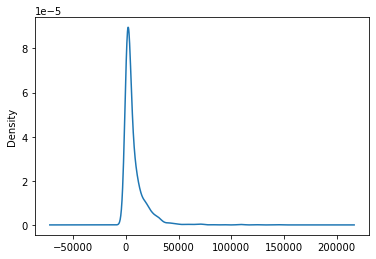

In [138]:
masterdata.favorite_count.plot(kind = 'density');

The graph above is skewed towards the right which implies that the distribution of the favourite count is positively skewed

####  Distribution of retweet count

In [139]:
masterdata.retweet_count.describe()

count     1955.000000
mean      2376.819437
std       4138.869990
min         11.000000
25%        517.000000
50%       1128.000000
75%       2737.000000
max      70365.000000
Name: retweet_count, dtype: float64

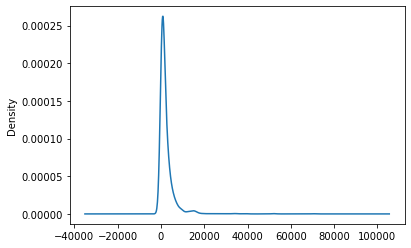

In [140]:
masterdata.retweet_count.plot(kind = 'density');

The graph above shows that the retweet count does not have a normal distribution. It is skewed to the right and can be confidently said that is positively skewed

### Visualization

#### Question 1: What is the most popular dog stage according to retweets?

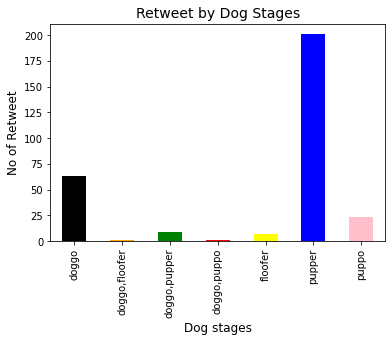

In [141]:
masterdata.groupby('dog_stage')['retweet_count'].count().plot(kind = 'bar', color = ['black','orange','green','red','yellow', 'blue', 'pink'])
plt.title('Retweet by Dog Stages', fontsize = 14)
plt.xlabel('Dog stages', fontsize = 12)
plt.ylabel('No of Retweet', fontsize = 12);

In [142]:
#value count of each dog stage
masterdata.dog_stage.value_counts()

pupper           201
doggo             63
puppo             23
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

The visualization abaove shows that pupper(usually a small dog) is the most popular dog stage followed by doggo, then puppo'. But since there were a lot of missing data it cannnot be confidently said that pupper is the most popular. 

#### Question 2: Does retweet count positively correlate with favourite count?

In [143]:
masterdata.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,0.027388,-0.028151,0.204597,0.112580,0.122096,0.004880,0.121255,-0.043259,0.091741,0.380918,0.569823
rating_numerator,0.027388,1.000000,0.172622,0.001444,0.000552,-0.018641,-0.017675,-0.024185,-0.002962,-0.019456,0.011771,0.009655
rating_denominator,-0.028151,0.172622,1.000000,0.000091,-0.001199,0.020969,-0.033641,0.019719,0.011443,0.024514,-0.021023,-0.025207
img_num,0.204597,0.001444,0.000091,1.000000,0.212081,0.030884,-0.161810,0.051371,-0.141805,0.061621,0.104588,0.124695
p1_conf,0.112580,0.000552,-0.001199,0.212081,1.000000,0.114389,-0.514756,0.127722,-0.712412,0.106404,0.055147,0.082462
p1_dog,0.122096,-0.018641,0.020969,0.030884,0.114389,1.000000,0.114177,0.629587,0.057228,0.558195,0.014209,0.055161
p2_conf,0.004880,-0.017675,-0.033641,-0.161810,-0.514756,0.114177,1.000000,0.100139,0.477140,0.070583,-0.008510,-0.023474
p2_dog,0.121255,-0.024185,0.019719,0.051371,0.127722,0.629587,0.100139,1.000000,0.050595,0.544075,0.024420,0.060244
p3_conf,-0.043259,-0.002962,0.011443,-0.141805,-0.712412,0.057228,0.477140,0.050595,1.000000,0.048037,-0.036225,-0.052919
p3_dog,0.091741,-0.019456,0.024514,0.061621,0.106404,0.558195,0.070583,0.544075,0.048037,1.000000,0.012919,0.047469


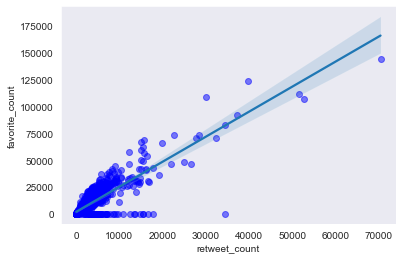

In [144]:
sns.set_style('dark')
sns.regplot(masterdata.retweet_count, masterdata.favorite_count, scatter_kws = {'color': 'Blue', 'alpha': 0.5});

From the visual representation above, there is a linear relationship between the two varibales. This does not imply an increase in retweet_count will cause an increase in favorite_count but when you compare both linearly, there is a strong positive linear relationship between retweet_count and favorite_Count.

#### Question 3: What is the most popular dog name?

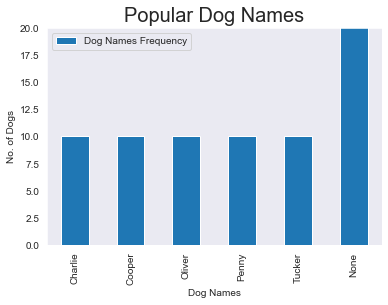

In [145]:
# Visualization representing the most popular dog names
dog_name = masterdata.query('name == name')
dog_name_grouped = dog_name.groupby('name').count()[['tweet_id']]
dog_name_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_name_grouped.query('name_count >= 10').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=20) 
plt.title("Popular Dog Names", {'fontsize' : 20})                                                 
plt.xlabel("Dog Names")
plt.ylabel("No. of Dogs")
plt.legend(["Dog Names Frequency"]);

Turns out the most popular dog names in this master dataset are Charlie, Cooper, Oliver, Penny and Tucker.